In [2]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 8.9 MB/s eta 0:00:000m eta 0:00:010:00:01


In [4]:
import pandas as pd
import numpy as np
import glob
import cv2

import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

In [7]:
dataset_path = '/media/marcos/DATA/datasets/raw/image/coil-100/*.png'
images_filenames = glob.glob(dataset_path)

In [9]:
img_arry = []
for img_path in images_filenames:
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)
    img_arry.append(img.flatten())

image_dataset = pd.DataFrame(img_arry)

print('shape:', image_dataset.shape)
image_dataset.head()

shape: (7200, 16384)


,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,49,47,26,26,26,26,26,26,26,26,...,26,25,26,26,26,26,26,26,26,26
1,49,47,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
2,49,47,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
3,49,47,25,25,25,22,24,22,22,25,...,28,26,26,27,25,27,27,27,30,25
4,49,47,26,26,26,26,26,26,26,26,...,28,26,26,26,26,26,26,26,26,26


In [71]:
labels = [int(path.split('/')[-1].split('__')[0].replace('obj', '')) for path in images_filenames]
y_true = pd.Series(labels, name='Y')

coil100_df = pd.concat([y_true, image_dataset], axis=1)
coil100_df = coil100_df.sort_values(by='Y')
coil100_df = coil100_df.reset_index(drop=True)

coil100_df

,Y,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,1,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
1,1,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
2,1,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
3,1,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
4,1,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,100,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
7196,100,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
7197,100,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
7198,100,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


<AxesSubplot:>

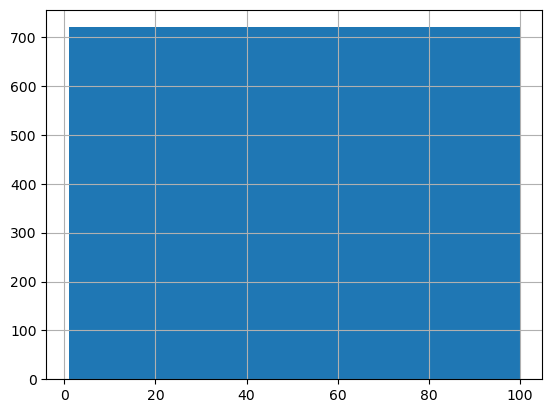

In [70]:
coil100_df['Y'].hist()

In [66]:
coil10 = [i for i in range(1, 11)]
coil10_df = coil100_df[coil100_df['Y'].isin(coil10)]
coil10_df = coil10_df.sort_values(by='Y')
coil10_df = coil10_df.reset_index(drop=True)
coil10_df

,Y,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,1,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
1,1,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
2,1,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
3,1,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
4,1,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,10,49,47,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
716,10,49,47,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
717,10,49,47,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
718,10,49,47,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27


In [67]:
coil20 = [i for i in range(1, 21)]
coil20_df = coil100_df[coil100_df['Y'].isin(coil20)]
coil20_df = coil20_df.sort_values(by='Y')
coil20_df = coil20_df.reset_index(drop=True)
coil20_df

,Y,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,1,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
1,1,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
2,1,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
3,1,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
4,1,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,20,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
1436,20,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
1437,20,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
1438,20,49,47,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


In [72]:
coil10_df.to_csv('./../datasets/coil-10.csv', sep=';', index=False)
coil20_df.to_csv('./../datasets/coil-20.csv', sep=';', index=False)
coil100_df.to_csv('./../datasets/coil-100.csv', sep=';', index=False)

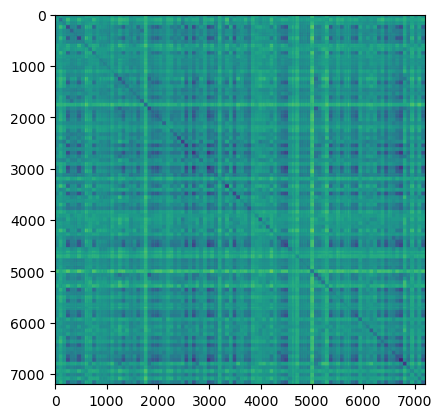

In [138]:
plt.imshow(pairwise_distances(coil100_df))

In [199]:
# print('mean:', pd.DataFrame(X).describe().loc['std', :].mean())
# print('std: ', pd.DataFrame(X).describe().loc['std', :].std())

print('mean:', np.array([X[y_true==i].std(axis=0).mean() for i in range(10)]).mean())
print('std:', np.array([X[y_true==i].std(axis=0).mean() for i in range(10)]).std())

mean: 3.670024028362834
std: 0.05590153504433267


In [266]:
data = pd.read_csv('../datasets/ORL.csv', sep=';')
X = data.values[:, 1:]
y_true = data.values[:, 0]
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,1,75,83,81,75,60,69,71,79,76,...,41,37,40,40,40,38,40,35,40,39
1,1,110,120,130,162,171,160,163,164,166,...,39,40,38,39,41,38,36,34,40,33
2,1,77,65,49,47,48,90,166,176,117,...,42,44,39,40,41,40,41,38,36,35
3,1,48,58,57,45,20,44,53,40,29,...,175,171,166,155,139,149,161,176,184,183
4,1,121,119,120,141,141,140,144,143,148,...,50,45,52,47,48,43,43,41,44,40


In [9]:
# !pip install umap-learn


X_reduced.shape

(500, 2)

Text(0.5, 1.0, '10 clusters (std=50.0)')

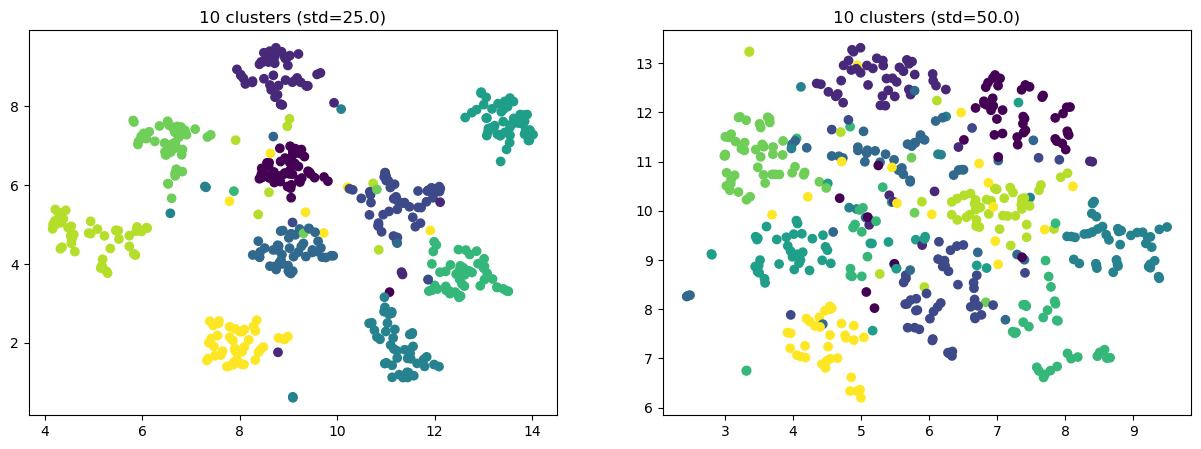

In [29]:
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import umap

k = 10
# std = 50.0

X1, y1 = make_blobs(n_samples=500, cluster_std= 25.5, centers=k, n_features=64)
X2, y2 = make_blobs(n_samples=500, cluster_std= 50.0, centers=k, n_features=64)
# X, y_true = load_digits(return_X_y=True)
# data = pd.read_csv('../datasets/ORL.csv')

# print('mean:', np.array([X[y_true==i].std(axis=0).mean() for i in range(10)]).mean())
# print('std:', np.array([X[y_true==i].std(axis=0).mean() for i in range(10)]).std())


#T-SNE
# X_reduced = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)


# UMAP
manifold = umap.UMAP().fit(X1, y1)
X1_reduced = manifold.transform(X1)

# UMAP
manifold = umap.UMAP().fit(X2, y2)
X2_reduced = manifold.transform(X2)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].scatter(X1_reduced[:, 0], X1_reduced[:, 1], c=y1)
axs[0].set_title(f'{k} clusters (std={25.0})')

axs[1].scatter(X2_reduced[:, 0], X2_reduced[:, 1], c=y2)
axs[1].set_title(f'{k} clusters (std={50.0})')

# plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
# plt.title(f'{k} clusters (std={std})')
# plt.show()


# _sorted = np.sort(np.concatenate([np.array(y)[:, None], X_reduced], axis=1), axis=0)
# X_sorted = _sorted[:, 1:]

# plt.imshow(pairwise_distances(X_sorted))
# plt.show()